In [27]:
#Data loading and data refinement
from IPython.display import Image

import numpy as np
import matplotlib.pyplot as plt
import scipy 
from scipy import signal
from scipy import interpolate

In [28]:
data = np.loadtxt('calcite.txt')

data=np.array(data)

from operator import itemgetter
first_item = itemgetter(0)
data = np.array(sorted(data, key = first_item))


In [29]:
#Load data and refine data using 1d spline interpolation

xvals=[]

yvals=[]

for i in range(0,data.shape[0]):
    xvals.append(data[i][0])
   
    
for i in range(0,data.shape[0]):
    yvals.append(data[i][1])

    
s = scipy.interpolate.interp1d(xvals, yvals)

xvals_fine=np.arange(min(xvals),max(xvals),0.5)
yvals_fine=[]

for x in np.arange(min(xvals),max(xvals),0.5):
    yvals_fine.append(s(x))

    

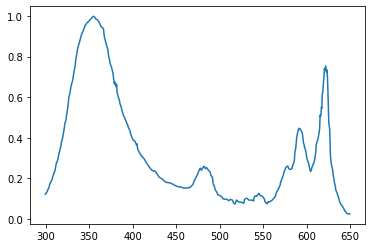

In [30]:
#Compute all maxima of signal
plt.plot(xvals_fine,yvals_fine)

peaks=scipy.signal.find_peaks(yvals_fine)
peaks=np.array(peaks)

intensities=[]

wavelengths = [] 

for i in range(0,peaks[0].shape[0]):
    wavelengths.append(xvals_fine[peaks[0][i]])

for i in range(0,peaks[0].shape[0]):
    intensities.append(yvals_fine[peaks[0][i]])


In [31]:
wavelengths

[355.043,
 379.543,
 381.543,
 405.043,
 478.043,
 482.043,
 485.043,
 512.543,
 519.543,
 531.043,
 541.043,
 545.043,
 556.043,
 578.543,
 591.543,
 615.543,
 617.043,
 620.543,
 622.043,
 623.543]

In [32]:
#Effective mass calculations assuming this is the lowest excited state

In [33]:
import skimage
from skimage import io

#Parameters
h= 4.1357*10e-15
R_eff=3.0
c=2.99792458e+17
alpha_01=2.4048

#Alpha_01 is the first root of the 0-th order spherical bessel function

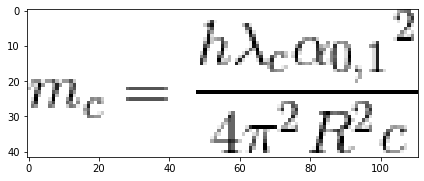

In [34]:
img=io.imread('CodeCogsEqn.gif')
io.imshow(img)

#effective mass of electron in band c, where c is determined from the band structure
def effective_mass(lambda_c):
    m_c=(h*lambda_c*(alpha_01**2))/(4*(np.pi)**2*(R_eff**2*c))
    return m_c

In [35]:
effective_masses=[effective_mass(lambda_c) for lambda_c in wavelengths]

In [36]:
effective_masses

[7.971957226842344e-31,
 8.522067923455535e-31,
 8.566974919097427e-31,
 9.094632117889674e-31,
 1.0733737458818773e-30,
 1.082355145010256e-30,
 1.0890911943565401e-30,
 1.1508383133641432e-30,
 1.1665557618388058e-30,
 1.1923772843328945e-30,
 1.2148307821538412e-30,
 1.2238121812822195e-30,
 1.2485110288852608e-30,
 1.2990313989823906e-30,
 1.3282209461496213e-30,
 1.382109340919893e-30,
 1.3854773655930351e-30,
 1.3933360898303664e-30,
 1.3967041145035083e-30,
 1.4000721391766502e-30]

Text(0, 0.5, 'Maxima Intensities')

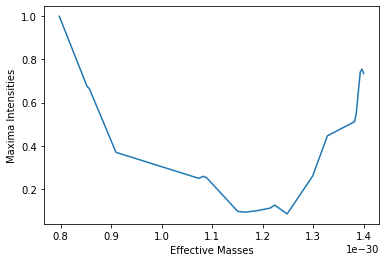

In [37]:
#Intensity at maxima vs effective mass at maxima
plt.plot(effective_masses,intensities)
plt.xlabel('Effective Masses')
plt.ylabel('Maxima Intensities')

In [38]:
#Connection with scattering experiments. Compton Scattering. What wavelengths of radiation do we measure in sample if we 
#irradiate with wavelength lambda_i ?

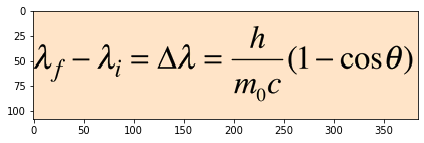

In [39]:
eqtn=io.imread('img.png')
io.imshow(eqtn)

In [40]:
#Parameters
#lambda_i is incident wavelength in nanometer


cos_theta=0.5
lambda_i=10

lambda_f=[]
lambda_exciton_approx=[]

for i in range(0,len(effective_masses)):
    lambda_f.append(lambda_i+(h/(effective_masses[i]*c))*(1-cos_theta))


In [41]:
lambda_f
    

[10.08652335864686,
 10.080938162010778,
 10.080513894434066,
 10.07584259652446,
 10.06426098243057,
 10.063727743840397,
 10.063333586556361,
 10.059935484094128,
 10.059127950572055,
 10.05784750542622,
 10.056778320436743,
 10.056361631695218,
 10.05524664967288,
 10.05309806327975,
 10.051931157707989,
 10.049906363688738,
 10.049785043868996,
 10.049504245191802,
 10.049384870216459,
 10.049266069579895]